# Opening the JSON and reading it into a python dictionary

In [1]:
import json
import re
import matplotlib.pyplot as plt

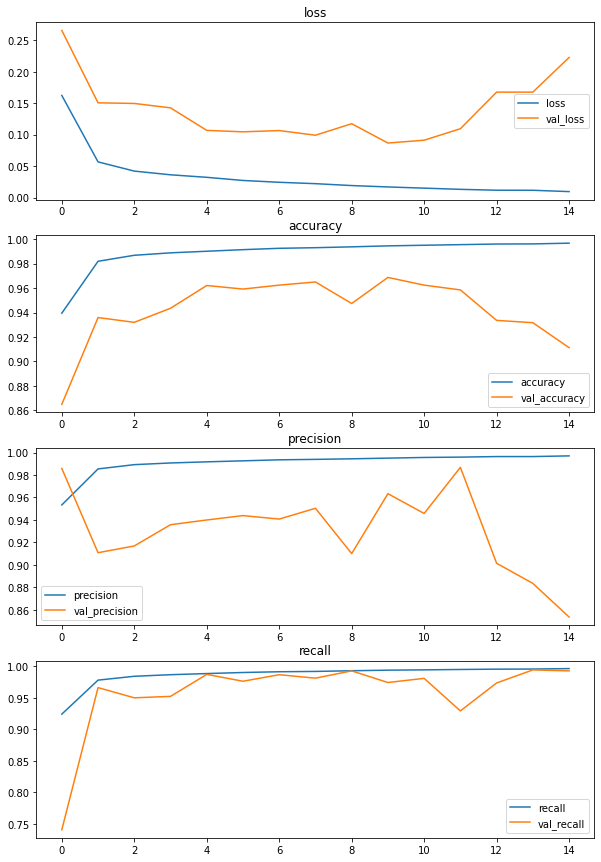

In [21]:
log_path = '../raw_data/GCP_logs/classifier_20210714/logs.json'
with open(log_path) as file:
    logs = json.load(file)

def format_string(input):
    output = input.split('/step - ')[1][:-1].replace(' - ',',')
    output_list = output.split(',')
    key_val = [(item.split(':')[0],float(item.split(':')[1])) for item in output_list]
    output_dict = dict(key_val)
    return output_dict

def build_history(logs):
    history= {'loss': [],
             'accuracy': [],
             'precision': [],
             'recall': [],
             'val_loss': [],
             'val_accuracy': [],
             'val_precision': [],
             'val_recall': []}
    
    for log in logs:
        log_history = format_string(log['jsonPayload']['message'])
        for k,v in history.items():
            v.append(log_history[k])
    return history

history = build_history(logs)

fig, axes = plt.subplots(4,1, figsize=(10,15))

for item, ax in zip(['loss','accuracy','precision','recall'], axes.flatten()):
    ax.set_title(item)
    ax.plot(history[item],label=item)
    ax.plot(history[f'val_{item}'],label=f'val_{item}')
    ax.legend()